# Objective:
1. We would like to predict, who are going to become as defaulter or deliquent customer
2. Defination: any customers, who are not paying the bills contionously for 180 days those customers are called as deliquent customers
3. data should have both acquistion file and performance file
4. curate the data, explore the data, treat the data
5. varaible creation,varaiable reduction 
6. model building and model validation
7. providing the recommendations

In [1]:
# import libraries into python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visulalization
from sklearn.model_selection import train_test_split # to split the data into training and validation
%matplotlib inline

In [2]:
col_acq = ['LoanID','Channel','SellerName','OrInterestRate','OrUnpaidPrinc','OrLoanTerm',
         'OrDate','FirstPayment','OrLTV','OrCLTV','NumBorrow','DTIRat','CreditScore',
        'FTHomeBuyer','LoanPurpose','PropertyType','NumUnits','OccStatus','PropertyState',
        'Zip','MortInsPerc','ProductType','CoCreditScore','MortInsType','RelMortInd']

col_per = ['LoanID','ReportingDate','Servicer','CurrInterestRate','CAUPB','LoanAge','MonthsToMaturity',
          'AdMonthsToMaturity','MaturityDate','MSA','CurDelStatus','ModFlag','ZeroBalCode','ZeroBalEffDate',
          'LastInstallDate','ForeclosureDate','DispositionDate','ForeclosureCost','RepairCost','AssetRecCost','MiscCostsPF',
           'ATFHP','NetSaleProceeds','CreditEnhProceeds','RPMWP','OtherForePro','NonInterestUPB','PricipleForgiven','RMWPF',
          'FPWA','ServicingIndicator']

In [3]:
acq07Q4=pd.read_csv("C:\\Users\\HP\\Documents\\Data Science\\Data Set\\Acquisition_2007Q4.txt",sep="|",names=col_acq)

per07Q4=pd.read_csv("C:\\Users\\HP\\Documents\\Data Science\\Data Set\\Performance_2007Q4.txt",sep="|",names=col_per, usecols=[0, 15])


In [4]:
print(acq07Q4.shape,per07Q4.shape)

(391209, 25) (20864257, 2)


In [5]:
per07Q4.tail()

,LoanID,ForeclosureDate
20864252,999999565669,NaN
20864253,999999565669,NaN
20864254,999999565669,NaN
20864255,999999565669,NaN
20864256,999999565669,NaN


In [6]:
per07Q4.drop_duplicates(subset='LoanID', keep='last', inplace=True)

In [7]:
per07Q4.shape

(391209, 2)

In [8]:
acq_perf=pd.merge(acq07Q4,per07Q4,on='LoanID')

In [9]:
acq_perf.shape

(391209, 26)

In [10]:
list(acq_perf.columns)

['LoanID',
 'Channel',
 'SellerName',
 'OrInterestRate',
 'OrUnpaidPrinc',
 'OrLoanTerm',
 'OrDate',
 'FirstPayment',
 'OrLTV',
 'OrCLTV',
 'NumBorrow',
 'DTIRat',
 'CreditScore',
 'FTHomeBuyer',
 'LoanPurpose',
 'PropertyType',
 'NumUnits',
 'OccStatus',
 'PropertyState',
 'Zip',
 'MortInsPerc',
 'ProductType',
 'CoCreditScore',
 'MortInsType',
 'RelMortInd',
 'ForeclosureDate']

In [11]:
acq_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391209 entries, 0 to 391208
Data columns (total 26 columns):
LoanID             391209 non-null int64
Channel            391209 non-null object
SellerName         391209 non-null object
OrInterestRate     391208 non-null float64
OrUnpaidPrinc      391209 non-null int64
OrLoanTerm         391209 non-null int64
OrDate             391209 non-null object
FirstPayment       391209 non-null object
OrLTV              391209 non-null int64
OrCLTV             391177 non-null float64
NumBorrow          391203 non-null float64
DTIRat             379728 non-null float64
CreditScore        390583 non-null float64
FTHomeBuyer        391209 non-null object
LoanPurpose        391209 non-null object
PropertyType       391209 non-null object
NumUnits           391209 non-null int64
OccStatus          391209 non-null object
PropertyState      391209 non-null object
Zip                391209 non-null int64
MortInsPerc        84925 non-null float64
ProductT

In [12]:
from datetime import datetime
datetime.strptime("10/2007", '%m/%Y')

datetime.datetime(2007, 10, 1, 0, 0)

In [13]:
acq_perf.head()

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,NumUnits,OccStatus,PropertyState,Zip,MortInsPerc,ProductType,CoCreditScore,MortInsType,RelMortInd,ForeclosureDate
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,10/2007,12/2007,86,86.0,...,1,P,CO,809,25.0,FRM,756.0,2.0,N,NaN
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,10/2007,12/2007,62,62.0,...,1,P,CA,920,NaN,FRM,790.0,NaN,N,NaN
2,100008184591,B,OTHER,6.625,81000,360,11/2007,01/2008,64,82.0,...,1,P,LA,708,NaN,FRM,NaN,NaN,N,NaN
3,100008870761,B,AMTRUST BANK,6.500,119000,360,11/2007,01/2008,71,71.0,...,1,P,IL,600,NaN,FRM,NaN,NaN,N,NaN
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,10/2007,12/2007,27,27.0,...,1,P,CA,907,NaN,FRM,NaN,NaN,N,NaN


In [14]:
acq_perf["FirstPayment"]=pd.to_datetime(acq_perf["FirstPayment"])
acq_perf["OrDate"]=pd.to_datetime(acq_perf["OrDate"])

In [15]:
acq_perf["date_diff"]=acq_perf["FirstPayment"]-acq_perf["OrDate"]

In [16]:
acq_perf["date_diff"].value_counts()/len(acq_perf)*100

61 days    86.255684
62 days     7.288176
92 days     2.458532
31 days     1.668418
30 days     1.241791
91 days     0.832547
59 days     0.230567
90 days     0.010992
89 days     0.005879
28 days     0.005112
0 days      0.002301
Name: date_diff, dtype: float64

# 95 % of customers are paying first EMI after 60 days

In [17]:
acq_perf.shape

(391209, 27)

In [18]:
acq_perf.head()

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,OccStatus,PropertyState,Zip,MortInsPerc,ProductType,CoCreditScore,MortInsType,RelMortInd,ForeclosureDate,date_diff
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,2007-10-01,2007-12-01,86,86.0,...,P,CO,809,25.0,FRM,756.0,2.0,N,NaN,61 days
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,2007-10-01,2007-12-01,62,62.0,...,P,CA,920,NaN,FRM,790.0,NaN,N,NaN,61 days
2,100008184591,B,OTHER,6.625,81000,360,2007-11-01,2008-01-01,64,82.0,...,P,LA,708,NaN,FRM,NaN,NaN,N,NaN,61 days
3,100008870761,B,AMTRUST BANK,6.500,119000,360,2007-11-01,2008-01-01,71,71.0,...,P,IL,600,NaN,FRM,NaN,NaN,N,NaN,61 days
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,2007-10-01,2007-12-01,27,27.0,...,P,CA,907,NaN,FRM,NaN,NaN,N,NaN,61 days


In [19]:
# removing the 9 records because of origination date and first payment date are the same
acq_perf1=acq_perf[acq_perf["date_diff"]!='0 days']

In [20]:
acq_perf1.shape

(391200, 27)

In [21]:
# dropping the orignation date,first payment and date diff
acq_perf1=acq_perf1.drop(["date_diff","OrDate","FirstPayment"],axis=1)

In [22]:
acq_perf1.rename(index=int, columns={"ForeclosureDate": 'Default'}, inplace=True)

In [23]:
acq_perf1.columns

Index(['LoanID', 'Channel', 'SellerName', 'OrInterestRate', 'OrUnpaidPrinc',
       'OrLoanTerm', 'OrLTV', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'FTHomeBuyer', 'LoanPurpose', 'PropertyType', 'NumUnits', 'OccStatus',
       'PropertyState', 'Zip', 'MortInsPerc', 'ProductType', 'CoCreditScore',
       'MortInsType', 'RelMortInd', 'Default'],
      dtype='object')

# defination of defaulter:
1. if default is missing then those customers non defaulters
2. if default date is presented then those customers are called as defaulters

In [24]:
acq_perf1['Default'].fillna(0, inplace=True)
acq_perf1['Default'] =np.where(acq_perf1['Default']==0,0,1)


In [25]:
acq_perf1["Default"].value_counts()/len(acq_perf1)*100

0    90.99591
1     9.00409
Name: Default, dtype: float64

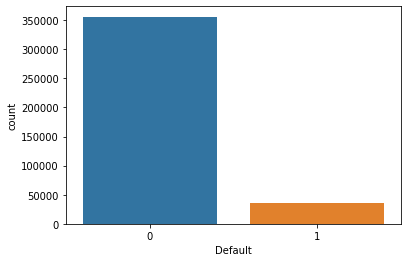

In [26]:
sns.countplot(acq_perf1["Default"])

In [27]:
acq_perf1.nunique()

LoanID            391200
Channel                3
SellerName            14
OrInterestRate       528
OrUnpaidPrinc        649
OrLoanTerm           140
OrLTV                 97
OrCLTV               120
NumBorrow              9
DTIRat                64
CreditScore          386
FTHomeBuyer            3
LoanPurpose            3
PropertyType           5
NumUnits               4
OccStatus              3
PropertyState         54
Zip                  893
MortInsPerc           18
ProductType            1
CoCreditScore        359
MortInsType            2
RelMortInd             2
Default                2
dtype: int64

In [28]:
acq_perf1["ProductType"].value_counts()

FRM    391200
Name: ProductType, dtype: int64

In [29]:
acq_perf1=acq_perf1.drop(["ProductType","Zip","PropertyState","LoanID"],axis=1)

In [30]:
acq_perf1.shape

(391200, 20)

In [31]:
acq_perf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391200 entries, 0 to 391208
Data columns (total 20 columns):
Channel           391200 non-null object
SellerName        391200 non-null object
OrInterestRate    391199 non-null float64
OrUnpaidPrinc     391200 non-null int64
OrLoanTerm        391200 non-null int64
OrLTV             391200 non-null int64
OrCLTV            391168 non-null float64
NumBorrow         391194 non-null float64
DTIRat            379720 non-null float64
CreditScore       390574 non-null float64
FTHomeBuyer       391200 non-null object
LoanPurpose       391200 non-null object
PropertyType      391200 non-null object
NumUnits          391200 non-null int64
OccStatus         391200 non-null object
MortInsPerc       84924 non-null float64
CoCreditScore     156233 non-null float64
MortInsType       84924 non-null float64
RelMortInd        391200 non-null object
Default           391200 non-null int32
dtypes: float64(8), int32(1), int64(4), object(7)
memory usage: 71.2

In [32]:
acq_perf1["RelMortInd"].value_counts()

N    389323
Y      1877
Name: RelMortInd, dtype: int64

In [33]:
pd.crosstab(acq_perf1["RelMortInd"],acq_perf1["Default"])

Default,0,1
RelMortInd,,
N,354179,35144
Y,1797,80


In [34]:
acq_perf1=acq_perf1[acq_perf1["RelMortInd"]=="N"]
acq_perf1.shape

(389323, 20)

In [35]:
acq_perf1=acq_perf1.drop(["RelMortInd"],axis=1)
acq_perf1.shape

(389323, 19)

In [36]:
acq_perf1["amt_flag"]=np.where((acq_perf1["Default"]==1)&(acq_perf1["OrUnpaidPrinc"]>0),1,0)

In [37]:
acq_perf1["amt_flag"].value_counts()

0    354179
1     35144
Name: amt_flag, dtype: int64

In [38]:
acq_perf1=acq_perf1.drop(["amt_flag"],axis=1)


In [39]:
acq_perf1["PropertyType"].value_counts()/len(acq_perf1)*100

SF    74.313102
PU    15.072832
CO     9.042106
MH     1.005849
CP     0.566111
Name: PropertyType, dtype: float64

In [40]:
acq_perf1["SellerName"].value_counts()/len(acq_perf1)*100

BANK OF AMERICA, N.A.                        28.651274
OTHER                                        15.012727
JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    10.067733
CITIMORTGAGE, INC.                            9.413520
WELLS FARGO BANK, N.A.                        7.479907
PNC BANK, N.A.                                7.027070
GMAC MORTGAGE, LLC                            5.751009
SUNTRUST MORTGAGE INC.                        4.096342
FLAGSTAR CAPITAL MARKETS CORPORATION          3.402830
AMTRUST BANK                                  2.835692
FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB      2.395954
FIRST TENNESSEE BANK NATIONAL ASSOCIATION     1.973683
CHASE HOME FINANCE, LLC                       1.754327
HSBC BANK USA, NATIONAL ASSOCIATION           0.137932
Name: SellerName, dtype: float64

In [41]:
pd.crosstab(acq_perf1["SellerName"],acq_perf1["Default"])

Default,0,1
SellerName,,
AMTRUST BANK,10044,996
"BANK OF AMERICA, N.A.",99169,12377
"CHASE HOME FINANCE, LLC",6218,612
"CITIMORTGAGE, INC.",33412,3237
"FDIC, RECEIVER, INDYMAC FEDERAL BANK FSB",7699,1629
FIRST TENNESSEE BANK NATIONAL ASSOCIATION,7063,621
FLAGSTAR CAPITAL MARKETS CORPORATION,11796,1452
"GMAC MORTGAGE, LLC",20257,2133
"HSBC BANK USA, NATIONAL ASSOCIATION",531,6


# Seller name insights:
1. 28% of total loans provided by bank of america
2. 50% of total loans are provided top 3 banks(BOA,others and JP)
3. more defaulters are happening at FDIC  20%

In [42]:
acq_perf1=acq_perf1.drop(["SellerName"],axis=1)
acq_perf1.shape

(389323, 18)

In [43]:
acq_perf1.describe().T

,count,mean,std,min,25%,50%,75%,max
OrInterestRate,389322.0,6.483363,0.387006,3.97,6.25,6.5,6.75,9.375
OrUnpaidPrinc,389323.0,197112.446478,101486.224643,8000.00,119000.00,180000.0,260000.00,802000.000
OrLoanTerm,389323.0,338.653439,56.834982,60.00,360.00,360.0,360.00,360.000
OrLTV,389323.0,72.148576,16.812060,1.00,64.00,78.0,80.00,97.000
OrCLTV,389291.0,73.745178,17.116090,1.00,65.00,80.0,87.00,143.000
NumBorrow,389317.0,1.523594,0.516007,1.00,1.00,2.0,2.00,10.000
DTIRat,378023.0,38.678652,12.508204,1.00,30.00,39.0,48.00,64.000
CreditScore,388817.0,720.094397,61.343348,392.00,673.00,725.0,774.00,843.000
NumUnits,389323.0,1.042160,0.257737,1.00,1.00,1.0,1.00,4.000
MortInsPerc,84360.0,23.035005,6.483059,6.00,17.00,25.0,25.00,39.000


In [44]:
acq_perf1["NumUnits"].value_counts()/len(acq_perf1)*100

1    96.781850
2     2.524639
3     0.389137
4     0.304375
Name: NumUnits, dtype: float64

In [45]:
pd.crosstab(acq_perf1["NumUnits"],acq_perf1["Default"])

Default,0,1
NumUnits,,
1,342912,33882
2,8790,1039
3,1398,117
4,1079,106


In [46]:
acq_perf1=acq_perf1[acq_perf1["NumUnits"]==1]
acq_perf1.shape

(376794, 18)

In [47]:
acq_perf1=acq_perf1.drop(["NumUnits"],axis=1)

In [48]:
acq_perf1["MortInsType"].value_counts()

1.0    71957
2.0    10370
Name: MortInsType, dtype: int64

In [49]:
# As the number of loans are less there are higher chance to foreclose the loans

In [50]:
def miss_cal(data):
    return(data.isnull().sum()/len(data)*100)

In [51]:
miss_cal(acq_perf1)

Channel            0.000000
OrInterestRate     0.000265
OrUnpaidPrinc      0.000000
OrLoanTerm         0.000000
OrLTV              0.000000
OrCLTV             0.008493
NumBorrow          0.001327
DTIRat             2.836563
CreditScore        0.130310
FTHomeBuyer        0.000000
LoanPurpose        0.000000
PropertyType       0.000000
OccStatus          0.000000
MortInsPerc       78.150661
CoCreditScore     59.833225
MortInsType       78.150661
Default            0.000000
dtype: float64

In [52]:
acq_perf2=pd.get_dummies(acq_perf1,drop_first=True)
acq_perf2.shape

(376794, 24)

In [53]:
columns = acq_perf1.columns[acq_perf1.isnull().any()]
print(columns)

Index(['OrInterestRate', 'OrCLTV', 'NumBorrow', 'DTIRat', 'CreditScore',
       'MortInsPerc', 'CoCreditScore', 'MortInsType'],
      dtype='object')


In [54]:
acq_perf1.shape

(376794, 17)

In [55]:
acq_perf1['OrInterestRate'].isnull().sum()

1

In [56]:
y = acq_perf1.loc[acq_perf1['OrInterestRate'].notnull(), 'OrInterestRate'].values

In [57]:
y.shape

(376793,)

In [58]:
X = acq_perf1.loc[acq_perf1['OrInterestRate'].notnull()].drop(columns, axis=1).values

In [59]:
from sklearn.linear_model import LinearRegression  # this will help us to impute the numerical varaible missing values
from sklearn.linear_model import LogisticRegression # this will help us to impute the categorical varaible missing values
def fillnan(df):
    columns = df.columns[df.isnull().any()]
    for name in columns:
        y = df.loc[df[name].notnull(), name].values # the varaibles, which are having missing but consider only non missing rows of missing variables
        X = df.loc[df[name].notnull()].drop(columns, axis=1).values # non missing variables values are considering
        X_test = df.loc[df[name].isnull()].drop(columns, axis=1).values # missing rows 
        if df[name].dtypes == 'object':
            model = LogisticRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
        else:
            model = LinearRegression()
            model.fit(X, y)
            df.loc[df[name].isnull(), name] = model.predict(X_test)
    return df

In [60]:
acq_perf3=fillnan(acq_perf2)

In [61]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
acq_perf4=pd.DataFrame(mn.fit_transform(acq_perf3),columns=acq_perf3.columns)

In [62]:
acq_perf4.shape

(376794, 24)

In [63]:
acq_perf4.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'MortInsPerc', 'CoCreditScore',
       'MortInsType', 'Default', 'Channel_C', 'Channel_R', 'FTHomeBuyer_U',
       'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R', 'PropertyType_CP',
       'PropertyType_MH', 'PropertyType_PU', 'PropertyType_SF', 'OccStatus_P',
       'OccStatus_S'],
      dtype='object')

In [64]:
sub_data=acq_perf4[['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV','DTIRat']]

In [65]:
sub_data.shape

(376794, 6)

In [66]:
from sklearn.cluster import KMeans
km=KMeans()
km.fit(sub_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

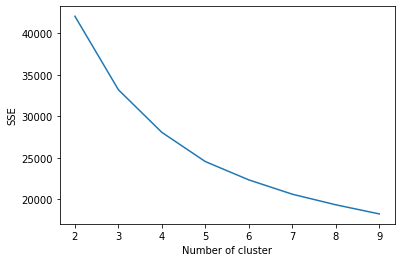

In [67]:
import matplotlib.pyplot as plt
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(sub_data)
    sub_data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [68]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
km.fit(sub_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
km.labels_

array([0, 0, 1, ..., 2, 0, 0])

In [70]:
acq_perf4["clusters"]=km.labels_

In [71]:
acq_perf4["clusters"].value_counts()

0    158264
2     91082
1     80132
3     47316
Name: clusters, dtype: int64

In [72]:
sub_data["clusters"]=km.labels_

C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
sub_data["clusters"].value_counts()

0    158264
2     91082
1     80132
3     47316
Name: clusters, dtype: int64

In [74]:
sub_data.head()

,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrLTV,OrCLTV,DTIRat,clusters
0,0.491212,0.542071,1.0,0.885417,0.598592,0.412698,0
1,0.421832,0.634304,1.0,0.635417,0.429577,0.539683,0
2,0.491212,0.118123,1.0,0.656250,0.570423,0.825397,1
3,0.468085,0.179612,1.0,0.729167,0.492958,0.539683,2
4,0.491212,0.318770,1.0,0.270833,0.183099,0.841270,0


In [75]:
sub_data_0=sub_data[sub_data["clusters"]==0]

In [76]:
sub_data_0.shape

(158264, 7)

In [77]:
sub_data_0.min()

OrInterestRate    0.005550
OrUnpaidPrinc     0.003236
OrLoanTerm        0.600000
OrLTV             0.000000
OrCLTV            0.000000
DTIRat            0.000000
clusters          0.000000
dtype: float64

In [78]:
sub_data_0.max()

OrInterestRate    0.93062
OrUnpaidPrinc     1.00000
OrLoanTerm        1.00000
OrLTV             1.00000
OrCLTV            1.00000
DTIRat            1.00000
clusters          0.00000
dtype: float64

In [79]:
acq_perf4.shape

(376794, 25)

In [80]:
acq_perf4.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'MortInsPerc', 'CoCreditScore',
       'MortInsType', 'Default', 'Channel_C', 'Channel_R', 'FTHomeBuyer_U',
       'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R', 'PropertyType_CP',
       'PropertyType_MH', 'PropertyType_PU', 'PropertyType_SF', 'OccStatus_P',
       'OccStatus_S', 'clusters'],
      dtype='object')

In [81]:
acq_perf4["clusters"].value_counts()

0    158264
2     91082
1     80132
3     47316
Name: clusters, dtype: int64

# Building model for First cluster

In [82]:
cluster_0_data=acq_perf4[acq_perf4["clusters"]==1]

In [83]:
cluster_0_data.shape

(80132, 25)

In [84]:
cluster_0_data=cluster_0_data.drop(["clusters"],axis=1)

# Splitting the data for training and test data

In [85]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(cluster_0_data,test_size=0.2,random_state=0)

In [86]:
print(train.shape,test.shape)

(64105, 24) (16027, 24)


# Applying variable reduction techniques
1. VIF
2. P-value
3. z-value

In [87]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [88]:
train.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'OrLTV', 'OrCLTV',
       'NumBorrow', 'DTIRat', 'CreditScore', 'MortInsPerc', 'CoCreditScore',
       'MortInsType', 'Default', 'Channel_C', 'Channel_R', 'FTHomeBuyer_U',
       'FTHomeBuyer_Y', 'LoanPurpose_P', 'LoanPurpose_R', 'PropertyType_CP',
       'PropertyType_MH', 'PropertyType_PU', 'PropertyType_SF', 'OccStatus_P',
       'OccStatus_S'],
      dtype='object')

In [89]:
vif_cal(input_data=train,dependent_col="Default")

OrInterestRate  VIF =  1.48
OrUnpaidPrinc  VIF =  1.22
OrLoanTerm  VIF =  7.15
OrLTV  VIF =  71.05
OrCLTV  VIF =  6.6
NumBorrow  VIF =  1.08
DTIRat  VIF =  1.9
CreditScore  VIF =  1.42
MortInsPerc  VIF =  71.04
CoCreditScore  VIF =  1.63
MortInsType  VIF =  1.31
Channel_C  VIF =  2.0
Channel_R  VIF =  2.0
FTHomeBuyer_U  VIF =  1.01
FTHomeBuyer_Y  VIF =  1.31
LoanPurpose_P  VIF =  2.41
LoanPurpose_R  VIF =  1.22
PropertyType_CP  VIF =  1.06
PropertyType_MH  VIF =  1.63
PropertyType_PU  VIF =  2.26
PropertyType_SF  VIF =  2.54
OccStatus_P  VIF =  1.98
OccStatus_S  VIF =  1.47


In [90]:
train=train.drop(["OrLTV"],axis=1)

In [91]:
vif_cal(input_data=train,dependent_col="Default")

OrInterestRate  VIF =  1.48
OrUnpaidPrinc  VIF =  1.22
OrLoanTerm  VIF =  2.52
OrCLTV  VIF =  6.1
NumBorrow  VIF =  1.08
DTIRat  VIF =  1.9
CreditScore  VIF =  1.42
MortInsPerc  VIF =  6.74
CoCreditScore  VIF =  1.62
MortInsType  VIF =  1.31
Channel_C  VIF =  2.0
Channel_R  VIF =  2.0
FTHomeBuyer_U  VIF =  1.01
FTHomeBuyer_Y  VIF =  1.31
LoanPurpose_P  VIF =  2.12
LoanPurpose_R  VIF =  1.21
PropertyType_CP  VIF =  1.06
PropertyType_MH  VIF =  1.33
PropertyType_PU  VIF =  2.26
PropertyType_SF  VIF =  2.54
OccStatus_P  VIF =  1.82
OccStatus_S  VIF =  1.47


In [92]:
train=train.drop(["OrCLTV"],axis=1)

In [93]:
vif_cal(input_data=train,dependent_col="Default")

OrInterestRate  VIF =  1.48
OrUnpaidPrinc  VIF =  1.21
OrLoanTerm  VIF =  2.13
NumBorrow  VIF =  1.08
DTIRat  VIF =  1.9
CreditScore  VIF =  1.41
MortInsPerc  VIF =  1.44
CoCreditScore  VIF =  1.62
MortInsType  VIF =  1.31
Channel_C  VIF =  2.0
Channel_R  VIF =  1.99
FTHomeBuyer_U  VIF =  1.01
FTHomeBuyer_Y  VIF =  1.31
LoanPurpose_P  VIF =  2.04
LoanPurpose_R  VIF =  1.18
PropertyType_CP  VIF =  1.06
PropertyType_MH  VIF =  1.29
PropertyType_PU  VIF =  2.26
PropertyType_SF  VIF =  2.54
OccStatus_P  VIF =  1.78
OccStatus_S  VIF =  1.47


In [94]:
train=train.drop(["PropertyType_SF"],axis=1)

In [95]:
vif_cal(input_data=train,dependent_col="Default")

OrInterestRate  VIF =  1.48
OrUnpaidPrinc  VIF =  1.21
OrLoanTerm  VIF =  2.13
NumBorrow  VIF =  1.07
DTIRat  VIF =  1.9
CreditScore  VIF =  1.41
MortInsPerc  VIF =  1.43
CoCreditScore  VIF =  1.62
MortInsType  VIF =  1.31
Channel_C  VIF =  2.0
Channel_R  VIF =  1.99
FTHomeBuyer_U  VIF =  1.01
FTHomeBuyer_Y  VIF =  1.3
LoanPurpose_P  VIF =  2.03
LoanPurpose_R  VIF =  1.18
PropertyType_CP  VIF =  1.02
PropertyType_MH  VIF =  1.06
PropertyType_PU  VIF =  1.05
OccStatus_P  VIF =  1.78
OccStatus_S  VIF =  1.47


In [96]:
train=train.drop(["LoanPurpose_P"],axis=1)

In [97]:
vif_cal(input_data=train,dependent_col="Default")

OrInterestRate  VIF =  1.47
OrUnpaidPrinc  VIF =  1.21
OrLoanTerm  VIF =  2.11
NumBorrow  VIF =  1.07
DTIRat  VIF =  1.9
CreditScore  VIF =  1.4
MortInsPerc  VIF =  1.28
CoCreditScore  VIF =  1.47
MortInsType  VIF =  1.19
Channel_C  VIF =  2.0
Channel_R  VIF =  1.99
FTHomeBuyer_U  VIF =  1.0
FTHomeBuyer_Y  VIF =  1.11
LoanPurpose_R  VIF =  1.03
PropertyType_CP  VIF =  1.02
PropertyType_MH  VIF =  1.06
PropertyType_PU  VIF =  1.04
OccStatus_P  VIF =  1.77
OccStatus_S  VIF =  1.46


In [98]:
X=train.drop(["Default"],axis=1)
y=train["Default"]

In [99]:
import statsmodels.formula.api as sm
model=sm.logit(formula="y~X",data=train).fit()
model.summary2()


Optimization terminated successfully.
         Current function value: 0.257629
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.186     
Dependent Variable: y                AIC:              33070.5896
Date:               2020-02-23 17:38 BIC:              33251.9551
No. Observations:   64105            Log-Likelihood:   -16515.   
Df Model:           19               LL-Null:          -20295.   
Df Residuals:       64085            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
Intercept       3.2272   0.2534  12.7369 0.0000   2.7306   3.7238
X[0]            1.3367   0.2254   5.9309 0.0000   0.8950   1.7785
X[1]            1.1989   0.1667   7.1931 0.0000   0.8722   1.5256
X[2]            1.2020   0.0964  12.4685 0.0000   1.0130   1.3909
X[3]          -11.0120   0.3449 -31.9289 0.0000 -11.6880 -10.3360
X[4]            0.7811   0.1308   5.9694 0.0000   0.5246   1.0375
X[5]           -1.0848   0.1291  -8.4019 0.0000  -1.3378  -0.8317
X[6]            3.2430   0.1704  19.0278 0.0000   2.9089   3.5770
X[7]          -11.5355   0.2300 -50.1522 0.0000 -11.9864 -11.0847
X[8]           -0.0865   0.1321  -0.6548 0.5126  -0.3454   0.1724
X[9]           -0.1324   0.0372  -3.5601 0.0004  -0.2054  -0.0595
X[10]          -0.3606   0.0382  -9.4326 0.0000  -0.4355  -0.2856
X[11]          -0.2916   0.4580  -0.6367 0.5243  -1.1893   0.6061
X[12]          -0.2205   0.0619  -3.5647 0.0004  -0.3418  -0.0993
X[13]           0.1187   0.0360   3.2924 0.0010   0.0480   0.1893
X[14]          -0.1659   0.3071  -0.5402 0.5891  -0.7677   0.4360
X[15]           0.8410   0.0969   8.6809 0.0000   0.6511   1.0309
X[16]           0.0910   0.0437   2.0826 0.0373   0.0054   0.1767
X[17]          -1.2230   0.0478 -25.5821 0.0000  -1.3167  -1.1293
X[18]          -0.5626   0.0794  -7.0835 0.0000  -0.7183  -0.4069
=================================================================

"""

In [100]:
train.shape

(64105, 20)

In [101]:
train.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'OrLoanTerm', 'NumBorrow', 'DTIRat',
       'CreditScore', 'MortInsPerc', 'CoCreditScore', 'MortInsType', 'Default',
       'Channel_C', 'Channel_R', 'FTHomeBuyer_U', 'FTHomeBuyer_Y',
       'LoanPurpose_R', 'PropertyType_CP', 'PropertyType_MH',
       'PropertyType_PU', 'OccStatus_P', 'OccStatus_S'],
      dtype='object')

In [102]:
train1=train.drop(["FTHomeBuyer_U"],axis=1)

In [103]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+MortInsType+Channel_C+ Channel_R+ FTHomeBuyer_U+FTHomeBuyer_Y+LoanPurpose_R+PropertyType_CP+PropertyType_MH+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.257629
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.186     
Dependent Variable:   Default          AIC:              33070.5896
Date:                 2020-02-23 17:38 BIC:              33251.9551
No. Observations:     64105            Log-Likelihood:   -16515.   
Df Model:             19               LL-Null:          -20295.   
Df Residuals:         64085            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         3.2272   0.2534  12.7369 0.0000   2.7306   3.7238
OrInterestRate    1.3367   0.2254   5.9309 0.0000   0.8950   1.7785
OrUnpaidPrinc     1.1989   0.1667   7.1931 0.0000   0.8722   1.5256
OrLoanTerm        1.2020   0.0964  12.4685 0.0000   1.0130   1.3909
NumBorrow       -11.0120   0.3449 -31.9289 0.0000 -11.6880 -10.3360
DTIRat            0.7811   0.1308   5.9694 0.0000   0.5246   1.0375
CreditScore      -1.0848   0.1291  -8.4019 0.0000  -1.3378  -0.8317
MortInsPerc       3.2430   0.1704  19.0278 0.0000   2.9089   3.5770
CoCreditScore   -11.5355   0.2300 -50.1522 0.0000 -11.9864 -11.0847
MortInsType      -0.0865   0.1321  -0.6548 0.5126  -0.3454   0.1724
Channel_C        -0.1324   0.0372  -3.5601 0.0004  -0.2054  -0.0595
Channel_R        -0.3606   0.0382  -9.4326 0.0000  -0.4355  -0.2856
FTHomeBuyer_U    -0.2916   0.4580  -0.6367 0.5243  -1.1893   0.6061
FTHomeBuyer_Y    -0.2205   0.0619  -3.5647 0.0004  -0.3418  -0.0993
LoanPurpose_R     0.1187   0.0360   3.2924 0.0010   0.0480   0.1893
PropertyType_CP  -0.1659   0.3071  -0.5402 0.5891  -0.7677   0.4360
PropertyType_MH   0.8410   0.0969   8.6809 0.0000   0.6511   1.0309
PropertyType_PU   0.0910   0.0437   2.0826 0.0373   0.0054   0.1767
OccStatus_P      -1.2230   0.0478 -25.5821 0.0000  -1.3167  -1.1293
OccStatus_S      -0.5626   0.0794  -7.0835 0.0000  -0.7183  -0.4069
===================================================================

"""

In [104]:
train1=train.drop(["FTHomeBuyer_U"],axis=1)

In [105]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+MortInsType+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_CP+PropertyType_MH+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train1).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.257632
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.186     
Dependent Variable:   Default          AIC:              33069.0194
Date:                 2020-02-23 17:38 BIC:              33241.3167
No. Observations:     64105            Log-Likelihood:   -16516.   
Df Model:             18               LL-Null:          -20295.   
Df Residuals:         64086            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         3.2284   0.2534  12.7420 0.0000   2.7318   3.7250
OrInterestRate    1.3375   0.2254   5.9346 0.0000   0.8958   1.7792
OrUnpaidPrinc     1.1993   0.1667   7.1956 0.0000   0.8726   1.5260
OrLoanTerm        1.2016   0.0964  12.4650 0.0000   1.0127   1.3906
NumBorrow       -11.0146   0.3449 -31.9380 0.0000 -11.6906 -10.3387
DTIRat            0.7819   0.1308   5.9762 0.0000   0.5255   1.0384
CreditScore      -1.0846   0.1291  -8.4011 0.0000  -1.3377  -0.8316
MortInsPerc       3.2408   0.1704  19.0198 0.0000   2.9069   3.5748
CoCreditScore   -11.5371   0.2300 -50.1593 0.0000 -11.9879 -11.0863
MortInsType      -0.0885   0.1321  -0.6699 0.5029  -0.3473   0.1704
Channel_C        -0.1329   0.0372  -3.5727 0.0004  -0.2058  -0.0600
Channel_R        -0.3606   0.0382  -9.4340 0.0000  -0.4355  -0.2857
FTHomeBuyer_Y    -0.2203   0.0619  -3.5614 0.0004  -0.3416  -0.0991
LoanPurpose_R     0.1190   0.0360   3.3018 0.0010   0.0484   0.1897
PropertyType_CP  -0.1662   0.3071  -0.5413 0.5883  -0.7680   0.4356
PropertyType_MH   0.8406   0.0969   8.6775 0.0000   0.6508   1.0305
PropertyType_PU   0.0906   0.0437   2.0722 0.0382   0.0049   0.1762
OccStatus_P      -1.2215   0.0478 -25.5804 0.0000  -1.3151  -1.1279
OccStatus_S      -0.5617   0.0794  -7.0736 0.0000  -0.7174  -0.4061
===================================================================

"""

In [106]:
train1["pred"]=model.predict()

In [107]:
train1.head()

,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,NumBorrow,DTIRat,CreditScore,MortInsPerc,CoCreditScore,MortInsType,Default,Channel_C,Channel_R,FTHomeBuyer_Y,LoanPurpose_R,PropertyType_CP,PropertyType_MH,PropertyType_PU,OccStatus_P,OccStatus_S,pred
301978,0.491212,0.278317,1.0,0.000000,0.936508,0.773836,0.791485,0.691080,0.404557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.304782
73638,0.468085,0.192557,0.4,0.111111,0.428571,0.472284,0.695049,0.563877,0.365492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.062836
156802,0.468085,0.224919,1.0,0.000000,0.761905,0.871397,0.754690,0.824479,0.309384,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.061731
332942,0.722479,0.106796,1.0,0.000000,0.904762,0.924612,0.901739,0.794817,0.319453,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235120
311795,0.421832,0.211974,1.0,0.111111,0.730159,0.882483,0.787165,0.821586,0.340647,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.007380


In [108]:
train1["pred_flag"]=np.where(train1["pred"]>=0.5,1,0)

In [109]:
train1["pred_flag"].value_counts()

0    63428
1      677
Name: pred_flag, dtype: int64

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(train1["Default"],train1["pred_flag"])

0.9019733250136495

In [111]:
train2=train1.drop(["MortInsType","pred","pred_flag"],axis=1)

In [112]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_CP+PropertyType_MH+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train2).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.257636
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.186     
Dependent Variable:   Default          AIC:              33067.4715
Date:                 2020-02-23 17:38 BIC:              33230.7005
No. Observations:     64105            Log-Likelihood:   -16516.   
Df Model:             17               LL-Null:          -20295.   
Df Residuals:         64087            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         3.2129   0.2522  12.7388 0.0000   2.7186   3.7073
OrInterestRate    1.3191   0.2237   5.8973 0.0000   0.8807   1.7574
OrUnpaidPrinc     1.1876   0.1658   7.1640 0.0000   0.8627   1.5125
OrLoanTerm        1.1988   0.0963  12.4506 0.0000   1.0101   1.3876
NumBorrow       -10.9958   0.3436 -32.0027 0.0000 -11.6693 -10.3224
DTIRat            0.7860   0.1307   6.0142 0.0000   0.5299   1.0422
CreditScore      -1.0865   0.1291  -8.4162 0.0000  -1.3395  -0.8335
MortInsPerc       3.2240   0.1687  19.1162 0.0000   2.8935   3.5546
CoCreditScore   -11.5260   0.2294 -50.2486 0.0000 -11.9755 -11.0764
Channel_C        -0.1313   0.0371  -3.5367 0.0004  -0.2040  -0.0585
Channel_R        -0.3602   0.0382  -9.4253 0.0000  -0.4351  -0.2853
FTHomeBuyer_Y    -0.2160   0.0615  -3.5107 0.0004  -0.3366  -0.0954
LoanPurpose_R     0.1197   0.0360   3.3211 0.0009   0.0490   0.1903
PropertyType_CP  -0.1602   0.3069  -0.5219 0.6017  -0.7618   0.4414
PropertyType_MH   0.8487   0.0961   8.8284 0.0000   0.6603   1.0371
PropertyType_PU   0.0909   0.0437   2.0794 0.0376   0.0052   0.1765
OccStatus_P      -1.2242   0.0476 -25.7315 0.0000  -1.3175  -1.1310
OccStatus_S      -0.5624   0.0794  -7.0829 0.0000  -0.7180  -0.4068
===================================================================

"""

In [113]:
train2["pred"]=model.predict()

In [114]:
train2["pred_flag"]=np.where(train2["pred"]>=0.5,1,0)

In [115]:
train2["pred_flag"].value_counts()

0    63428
1      677
Name: pred_flag, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(train2["Default"],train2["pred_flag"])

0.9020045238280945

In [117]:
train3=train2.drop(["PropertyType_CP"],axis=1)


In [118]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_MH+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train3).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.257638
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.186     
Dependent Variable:   Default          AIC:              33065.7555
Date:                 2020-02-23 17:38 BIC:              33219.9162
No. Observations:     64105            Log-Likelihood:   -16516.   
Df Model:             16               LL-Null:          -20295.   
Df Residuals:         64088            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         3.2148   0.2522  12.7473 0.0000   2.7205   3.7091
OrInterestRate    1.3177   0.2237   5.8915 0.0000   0.8793   1.7560
OrUnpaidPrinc     1.1877   0.1658   7.1650 0.0000   0.8628   1.5126
OrLoanTerm        1.1987   0.0963  12.4492 0.0000   1.0100   1.3874
NumBorrow       -10.9961   0.3436 -32.0017 0.0000 -11.6696 -10.3226
DTIRat            0.7861   0.1307   6.0148 0.0000   0.5300   1.0423
CreditScore      -1.0876   0.1291  -8.4262 0.0000  -1.3406  -0.8347
MortInsPerc       3.2253   0.1686  19.1251 0.0000   2.8947   3.5558
CoCreditScore   -11.5281   0.2294 -50.2639 0.0000 -11.9776 -11.0785
Channel_C        -0.1307   0.0371  -3.5238 0.0004  -0.2034  -0.0580
Channel_R        -0.3602   0.0382  -9.4243 0.0000  -0.4351  -0.2853
FTHomeBuyer_Y    -0.2182   0.0614  -3.5527 0.0004  -0.3385  -0.0978
LoanPurpose_R     0.1199   0.0360   3.3267 0.0009   0.0492   0.1905
PropertyType_MH   0.8496   0.0961   8.8388 0.0000   0.6612   1.0379
PropertyType_PU   0.0914   0.0437   2.0920 0.0364   0.0058   0.1770
OccStatus_P      -1.2249   0.0476 -25.7553 0.0000  -1.3181  -1.1317
OccStatus_S      -0.5630   0.0794  -7.0908 0.0000  -0.7186  -0.4074
===================================================================

"""

In [119]:
train3["pred"]=model.predict()
train3["pred_flag"]=np.where(train3["pred"]>=0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(train3["Default"],train3["pred_flag"])

0.9020045238280945

In [120]:
train4=train3.drop(["PropertyType_MH"],axis=1)


In [121]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+CreditScore+MortInsPerc+CoCreditScore+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train4).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.258170
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.185     
Dependent Variable:   Default          AIC:              33131.9165
Date:                 2020-02-23 17:38 BIC:              33277.0090
No. Observations:     64105            Log-Likelihood:   -16550.   
Df Model:             15               LL-Null:          -20295.   
Df Residuals:         64089            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         3.1213   0.2519  12.3902 0.0000   2.6276   3.6151
OrInterestRate    1.5337   0.2223   6.8986 0.0000   1.0980   1.9695
OrUnpaidPrinc     1.1001   0.1651   6.6644 0.0000   0.7766   1.4237
OrLoanTerm        1.1177   0.0952  11.7428 0.0000   0.9312   1.3043
NumBorrow       -10.8544   0.3424 -31.7017 0.0000 -11.5255 -10.1833
DTIRat            0.7927   0.1305   6.0730 0.0000   0.5369   1.0485
CreditScore      -1.0420   0.1288  -8.0897 0.0000  -1.2945  -0.7896
MortInsPerc       3.2126   0.1686  19.0504 0.0000   2.8821   3.5432
CoCreditScore   -11.4692   0.2288 -50.1306 0.0000 -11.9177 -11.0208
Channel_C        -0.1623   0.0368  -4.4041 0.0000  -0.2345  -0.0900
Channel_R        -0.3698   0.0382  -9.6848 0.0000  -0.4446  -0.2949
FTHomeBuyer_Y    -0.2009   0.0613  -3.2792 0.0010  -0.3209  -0.0808
LoanPurpose_R     0.1318   0.0360   3.6650 0.0002   0.0613   0.2023
PropertyType_PU   0.0794   0.0436   1.8199 0.0688  -0.0061   0.1648
OccStatus_P      -1.1758   0.0472 -24.9294 0.0000  -1.2683  -1.0834
OccStatus_S      -0.5011   0.0789  -6.3468 0.0000  -0.6558  -0.3463
===================================================================

"""

In [122]:
train4["pred"]=model.predict()
train4["pred_flag"]=np.where(train4["pred"]>=0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(train4["Default"],train4["pred_flag"])

0.9020357226425396

In [123]:
train5=train4.drop(["CreditScore"],axis=1)

In [124]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+OrLoanTerm+NumBorrow+DTIRat+MortInsPerc+CoCreditScore+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train5).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.258681
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.183     
Dependent Variable:   Default          AIC:              33195.4814
Date:                 2020-02-23 17:38 BIC:              33331.5055
No. Observations:     64105            Log-Likelihood:   -16583.   
Df Model:             14               LL-Null:          -20295.   
Df Residuals:         64090            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         2.7882   0.2484  11.2241 0.0000   2.3014   3.2751
OrInterestRate    1.8659   0.2192   8.5127 0.0000   1.4363   2.2955
OrUnpaidPrinc     1.0807   0.1650   6.5511 0.0000   0.7574   1.4040
OrLoanTerm        1.1218   0.0953  11.7663 0.0000   0.9349   1.3087
NumBorrow       -10.9006   0.3417 -31.9009 0.0000 -11.5703 -10.2308
DTIRat            0.7788   0.1303   5.9772 0.0000   0.5234   1.0342
MortInsPerc       3.0090   0.1665  18.0755 0.0000   2.6828   3.3353
CoCreditScore   -12.0619   0.2168 -55.6247 0.0000 -12.4869 -11.6369
Channel_C        -0.1693   0.0368  -4.5983 0.0000  -0.2415  -0.0972
Channel_R        -0.3753   0.0382  -9.8345 0.0000  -0.4501  -0.3005
FTHomeBuyer_Y    -0.2063   0.0612  -3.3713 0.0007  -0.3262  -0.0864
LoanPurpose_R     0.1401   0.0359   3.8997 0.0001   0.0697   0.2106
PropertyType_PU   0.0798   0.0436   1.8323 0.0669  -0.0056   0.1653
OccStatus_P      -1.1136   0.0465 -23.9609 0.0000  -1.2047  -1.0226
OccStatus_S      -0.4629   0.0788  -5.8782 0.0000  -0.6173  -0.3086
===================================================================

"""

In [125]:
train5["pred"]=model.predict()
train5["pred_flag"]=np.where(train5["pred"]>=0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(train5["Default"],train5["pred_flag"])

0.902254114343655

In [126]:
train6=train5.drop(["OrLoanTerm"],axis=1)


In [127]:
import statsmodels.formula.api as sm
model=sm.logit(formula="Default~OrInterestRate+OrUnpaidPrinc+NumBorrow+DTIRat+MortInsPerc+CoCreditScore+Channel_C+ Channel_R+ FTHomeBuyer_Y+LoanPurpose_R+PropertyType_PU+OccStatus_P+ OccStatus_S",data=train6).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.259846
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.179     
Dependent Variable:   Default          AIC:              33342.9072
Date:                 2020-02-23 17:38 BIC:              33469.8631
No. Observations:     64105            Log-Likelihood:   -16657.   
Df Model:             13               LL-Null:          -20295.   
Df Residuals:         64091            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                 Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------------
Intercept         2.7429   0.2467  11.1201 0.0000   2.2595   3.2264
OrInterestRate    2.2593   0.2139  10.5609 0.0000   1.8400   2.6785
OrUnpaidPrinc     1.2295   0.1602   7.6726 0.0000   0.9154   1.5435
NumBorrow       -11.2690   0.3420 -32.9482 0.0000 -11.9394 -10.5987
DTIRat            1.6939   0.1034  16.3756 0.0000   1.4912   1.8967
MortInsPerc       3.2268   0.1642  19.6476 0.0000   2.9049   3.5487
CoCreditScore   -12.1585   0.2170 -56.0355 0.0000 -12.5838 -11.7333
Channel_C        -0.1768   0.0368  -4.8057 0.0000  -0.2489  -0.1047
Channel_R        -0.3848   0.0381 -10.0926 0.0000  -0.4595  -0.3100
FTHomeBuyer_Y    -0.1947   0.0613  -3.1738 0.0015  -0.3149  -0.0744
LoanPurpose_R     0.1610   0.0359   4.4847 0.0000   0.0906   0.2313
PropertyType_PU   0.0903   0.0436   2.0725 0.0382   0.0049   0.1757
OccStatus_P      -1.1146   0.0463 -24.0721 0.0000  -1.2053  -1.0238
OccStatus_S      -0.4542   0.0786  -5.7754 0.0000  -0.6083  -0.3000
===================================================================

"""

In [128]:
train6["pred"]=model.predict()
train6["pred_flag"]=np.where(train6["pred"]>=0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(train6["Default"],train6["pred_flag"])

0.9020981202714297

In [129]:
test["pred"]=model.predict(test)

C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
test.head()

,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrLTV,OrCLTV,NumBorrow,DTIRat,CreditScore,MortInsPerc,CoCreditScore,...,FTHomeBuyer_Y,LoanPurpose_P,LoanPurpose_R,PropertyType_CP,PropertyType_MH,PropertyType_PU,PropertyType_SF,OccStatus_P,OccStatus_S,pred
20501,0.468085,0.082524,0.4,0.666667,0.450704,0.000000,0.603175,0.605322,0.654569,0.654640,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.115250
51947,0.606846,0.077670,0.4,0.718750,0.485915,0.111111,0.730159,0.439024,0.647971,0.519824,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.240524
11011,0.375578,0.270227,1.0,0.666667,0.450704,0.000000,0.809524,0.456763,0.665073,0.709843,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.063629
305595,0.468085,0.310680,1.0,0.822917,0.556338,0.111111,0.857143,0.556541,0.796690,0.508811,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.410050
49310,0.491212,0.236246,1.0,0.760417,0.514085,0.000000,0.698413,0.592018,0.746352,0.696430,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.105082


In [131]:

test["pred_flag"]=np.where(test["pred"]>=0.5,1,0)
from sklearn.metrics import accuracy_score
accuracy_score(test["Default"],test["pred_flag"])

C:\Users\HP\.conda\envs\Data Science\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.9024770699444687

In [132]:
from sklearn.metrics import precision_score
print("train data ***",precision_score(train6["Default"],train6["pred_flag"]))
print("test data ***",precision_score(test["Default"],test["pred_flag"]))

train data *** 0.4182621502209131
test data *** 0.43209876543209874


In [133]:
from sklearn.metrics import recall_score
print("train data ***",recall_score(train6["Default"],train6["pred_flag"]))
print("test data ***",recall_score(test["Default"],test["pred_flag"]))

train data *** 0.04606650446066504
test data *** 0.045425048669695


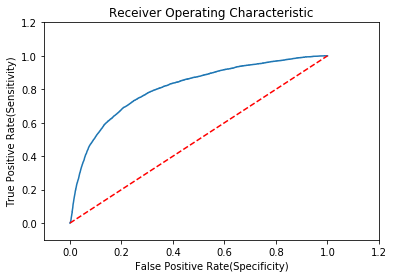

0.8090282141578348

In [134]:

######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train6[['Default']]
predicted_values1=train6[["pred"]]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [135]:
train6.columns

Index(['OrInterestRate', 'OrUnpaidPrinc', 'NumBorrow', 'DTIRat', 'MortInsPerc',
       'CoCreditScore', 'Default', 'Channel_C', 'Channel_R', 'FTHomeBuyer_Y',
       'LoanPurpose_R', 'PropertyType_PU', 'OccStatus_P', 'OccStatus_S',
       'pred', 'pred_flag'],
      dtype='object')

In [136]:
train7=train6[["Default","pred"]]

In [137]:
train7.head()

,Default,pred
301978,1.0,0.332197
73638,0.0,0.069049
156802,0.0,0.059397
332942,0.0,0.290747
311795,0.0,0.006645


In [138]:
train8=train7.sort_values("pred",ascending=False).reset_index().drop(["index"],axis=1)

In [139]:
train8["row_no"]=train8.index

In [140]:
train8.shape

(64105, 3)

In [141]:
def bin_cra(row_no):
    if row_no<11551:
        return 1
    elif row_no<23103:
        return 2
    elif row_no<34654:
        return 3
    elif row_no<46206:
        return 4
    elif row_no<57758:
        return 5
    elif row_no<69309:
        return 6
    elif row_no<80861:
        return 7
    elif row_no<92412:
        return 8
    elif row_no<103964:
        return 9
    else:
        return 10
        

In [142]:
train8["bin_flag"]=train8["row_no"].apply(bin_cra)

In [143]:
train8.head()

,Default,pred,row_no,bin_flag
0,0.0,0.988537,0,1
1,0.0,0.987441,1,1
2,0.0,0.923361,2,1
3,0.0,0.896460,3,1
4,0.0,0.881444,4,1


In [144]:
train8["bin_flag"].value_counts()

5    11552
4    11552
2    11552
3    11551
1    11551
6     6347
Name: bin_flag, dtype: int64

In [145]:
pd.crosstab(train8["bin_flag"],train8["Default"])

Default,0.0,1.0
bin_flag,,
1,7896,3655
2,10352,1200
3,10993,558
4,11137,415
5,11285,267
6,6277,70
